# Importing necessary libraries

In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import string  # For string operations
import re  # For regular expressions
import nltk  # For natural language processing
from nltk.tokenize import word_tokenize, sent_tokenize  # Tokenization
from nltk.corpus import stopwords  # For removing common words
from nltk.stem import PorterStemmer, WordNetLemmatizer  # For stemming and lemmatization
nltk.download('punkt')  # Tokenization resource
nltk.download('stopwords')  # Common words resource
nltk.download('wordnet')  # Lemmatization resource

from imblearn.over_sampling import SMOTE  # For dealing with imbalanced datasets
from sklearn.feature_extraction.text import CountVectorizer  # For text feature extraction


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading dataset

In [ ]:
data = pd.read_csv('/content/GrpB Cleaned data .csv')
data.head()

,Count,Hate Speech,Offensive Language,Neither Count,Class,Tweet
0,3,1,2,0,1,Am sorry I can't stand stand some black female...
1,4,1,3,0,1,Am zoneing they say I'm possessed it's a omen ...
2,3,0,3,0,1,"Amanda Bynes is crazy, idc what else y'all wan..."
3,3,0,3,0,1,Amanda is a bitch omg I would beat her ass lol
4,3,0,0,3,2,Amazing. You know what they say about birds of...


# Reducing DataFrame to first 6000 rows

In [ ]:
df_reduced = data.head(6000)
df = df_reduced
# Print the shape of the reduced DataFrame
print("Shape of reduced DataFrame:", df.shape)

Shape of reduced DataFrame: (6000, 6)


# Summarizing the dataset

In [ ]:
# Print DataFrame information
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Count               6000 non-null   int64 
 1   Hate Speech         6000 non-null   int64 
 2   Offensive Language  6000 non-null   int64 
 3   Neither Count       6000 non-null   int64 
 4   Class               6000 non-null   int64 
 5   Tweet               6000 non-null   object
dtypes: int64(5), object(1)
memory usage: 281.4+ KB
None
             Count  Hate Speech  Offensive Language  Neither Count  \
count  6000.000000  6000.000000         6000.000000    6000.000000   
mean      3.267833     0.269333            2.476167       0.522333   
std       0.920999     0.612799            1.380247       1.093023   
min       3.000000     0.000000            0.000000       0.000000   
25%       3.000000     0.000000            2.000000       0.000000   
50%       3.000000     0.000000  

# Data cleaning:


*   removing duplicates
*   removing punctuation
*   Lowercasing
*   removing numbers
*   removing blank spaces

*   Removing stopwords




In [ ]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Function to remove punctuation from a string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to all text columns
df = df.applymap(lambda x: remove_punctuation(x) if isinstance(x, str) else x)

# Convert all string values to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Function to remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function
df['Tweet'] = df['Tweet'].apply(lambda x: remove_numbers(x) if isinstance(x, str) else x)

# Function to remove leading and trailing whitespace
def remove_whitespace(text):
    return text.strip()

# Apply the function
df['Tweet'] = df['Tweet'].apply(lambda x: remove_whitespace(x) if isinstance(x, str) else x)


0


<ipython-input-7-37724d756cac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


# Tokenizing & Lemmatizing

In [ ]:
lemmatizer = WordNetLemmatizer()

# Load NLTK's stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return lemmatized_tokens

# Apply preprocessing to the "tweet" column
df['preprocessed_tweet'] = df['Tweet'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else [])


In [ ]:
# Combine tokens into a single string in 'final_text' column
df['final_text'] = df['preprocessed_tweet'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df.head()

,Count,Hate Speech,Offensive Language,Neither Count,Class,Tweet,preprocessed_tweet,final_text
0,3,1,2,0,1,am sorry i cant stand stand some black females...,"[sorry, cant, stand, stand, black, female, esp...",sorry cant stand stand black female especially...
1,4,1,3,0,1,am zoneing they say im possessed its a omen i ...,"[zoneing, say, im, possessed, omen, keep, like...",zoneing say im possessed omen keep like roman ...
2,3,0,3,0,1,amanda bynes is crazy idc what else yall wanna...,"[amanda, bynes, crazy, idc, else, yall, wan, n...",amanda bynes crazy idc else yall wan na call d...
3,3,0,3,0,1,amanda is a bitch omg i would beat her ass lol,"[amanda, bitch, omg, would, beat, as, lol]",amanda bitch omg would beat as lol
4,3,0,0,3,2,amazing you know what they say about birds of ...,"[amazing, know, say, bird, feather, httptcomef...",amazing know say bird feather httptcomefmpbaw




*   Feature Selection



In [ ]:
df.to_csv('preprocessed.csv', index=False)

In [ ]:
class_counts = df['Class'].value_counts()

# Print the total count of data in the column 'Class'
print(class_counts)

Class
1    4761
2     945
0     294
Name: count, dtype: int64




* The data is highly skewed



# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the text data
X_vectorized = vectorizer.fit_transform(df['final_text'])

# Check the shape of the vectorized data
print("Shape of vectorized data:", X_vectorized.shape)


Shape of vectorized data: (6000, 9707)


In [ ]:
# Convert the vectorized data into a DataFrame
df_vectorized = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Display the vectorized data
print("Vectorized Data:")
print(df_vectorized)


Vectorized Data:
       aa  aaliyah  aan  aap  aaronmacgruder  aaronworthing  abdelka  \
0     0.0      0.0  0.0  0.0        0.000000            0.0      0.0   
1     0.0      0.0  0.0  0.0        0.000000            0.0      0.0   
2     0.0      0.0  0.0  0.0        0.000000            0.0      0.0   
3     0.0      0.0  0.0  0.0        0.000000            0.0      0.0   
4     0.0      0.0  0.0  0.0        0.000000            0.0      0.0   
...   ...      ...  ...  ...             ...            ...      ...   
5995  0.0      0.0  0.0  0.0        0.000000            0.0      0.0   
5996  0.0      0.0  0.0  0.0        0.353626            0.0      0.0   
5997  0.0      0.0  0.0  0.0        0.000000            0.0      0.0   
5998  0.0      0.0  0.0  0.0        0.000000            0.0      0.0   
5999  0.0      0.0  0.0  0.0        0.000000            0.0      0.0   

      abduction  abdurahman  ability  ...  zijn  zima  zimmerman  zip  zone  \
0           0.0         0.0      0.0  .

# Balancing the dataset

In [ ]:
# Target variable
y = df['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

# Combine resampled features and target variable into a DataFrame
df_resampled = pd.DataFrame(X_resampled.toarray(), columns=vectorizer.get_feature_names_out())
df_resampled['Class'] = y_resampled

# Check the class distribution after balancing
print("Class distribution after balancing:")
print(df_resampled['Class'].value_counts())

Class distribution after balancing:
Class
1    4761
2    4761
0    4761
Name: count, dtype: int64


# visualization

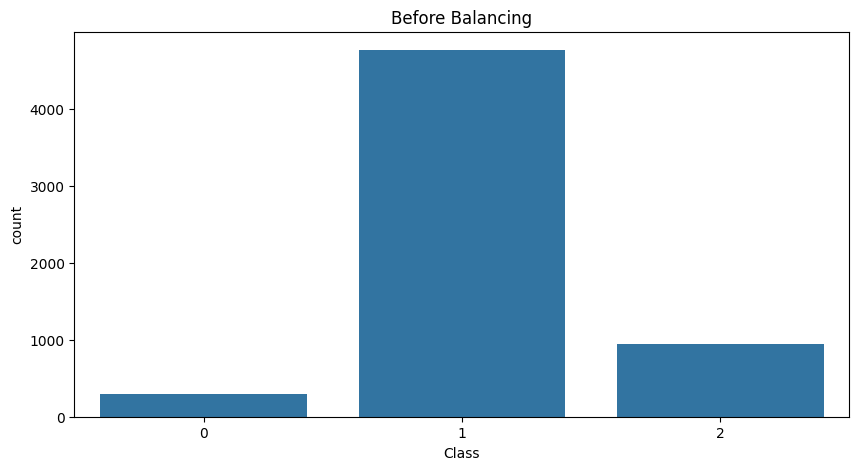

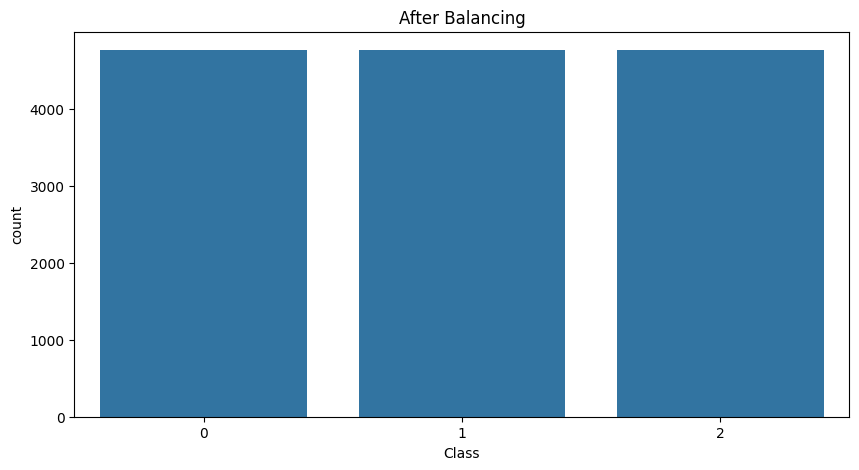

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before Balancing
plt.figure(figsize=(10, 5))
sns.countplot(x='Class', data=df)
plt.title('Before Balancing')
plt.show()

# After Balancing
plt.figure(figsize=(10, 5))
sns.countplot(x=y_resampled)
plt.title('After Balancing')
plt.show()


# Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop('Class', axis=1), df_resampled['Class'], test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 11426
Testing set size: 2857


#  Model Development and Model Evaluation

## Logistic Regression

In [ ]:
# Initialize Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.952397619880994
Confusion Matrix:
 [[918   3   0]
 [ 66 850  56]
 [  0  11 953]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       921
           1       0.98      0.87      0.93       972
           2       0.94      0.99      0.97       964

    accuracy                           0.95      2857
   macro avg       0.95      0.95      0.95      2857
weighted avg       0.95      0.95      0.95      2857




###### *The Logistic Regression model achieved an accuracy of 95.2%, with high precision, recall, and f1-scores across all classes, demonstrating strong performance in predicting hate speech, offensive language, and neither.*




## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9870493524676234
Confusion Matrix:
 [[921   0   0]
 [  2 949  21]
 [  0  14 950]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       921
           1       0.99      0.98      0.98       972
           2       0.98      0.99      0.98       964

    accuracy                           0.99      2857
   macro avg       0.99      0.99      0.99      2857
weighted avg       0.99      0.99      0.99      2857



###### *The SVM model achieved an accuracy of 98.7%, with near-perfect precision, recall, and f1-scores across all classes*

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9772488624431221
Confusion Matrix:
 [[913   8   0]
 [  7 920  45]
 [  0   5 959]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       921
           1       0.99      0.95      0.97       972
           2       0.96      0.99      0.97       964

    accuracy                           0.98      2857
   macro avg       0.98      0.98      0.98      2857
weighted avg       0.98      0.98      0.98      2857



###### *The Random Forest model achieved an accuracy of 97.7%, with exceptionally high precision, recall, and f1-scores across all classes, indicating robust performance in classifying hate speech, offensive language, and neither.*

# Saving the model

In [ ]:
import joblib

# Save Logistic Regression model
joblib.dump(logistic_model, 'logistic_model.pkl')

# Save SVM model
joblib.dump(svm_model, 'svm_model.pkl')

# Save Random Forest model
joblib.dump(rf_model, 'rf_model.pkl')

print("Models have been saved successfully.")


Models have been saved successfully.
